In [1]:
from patsy import demo_data
import pandas as pd

df = pd.DataFrame(demo_data("x1", "x2", "x3", "x4", "x5"))
df

,x1,x2,x3,x4,x5
0,1.764052,-0.977278,0.144044,0.333674,-2.552990
1,0.400157,0.950088,1.454274,1.494079,0.653619
2,0.978738,-0.151357,0.761038,-0.205158,0.864436
3,2.240893,-0.103219,0.121675,0.313068,-0.742165
4,1.867558,0.410599,0.443863,-0.854096,2.269755


<AxesSubplot:>

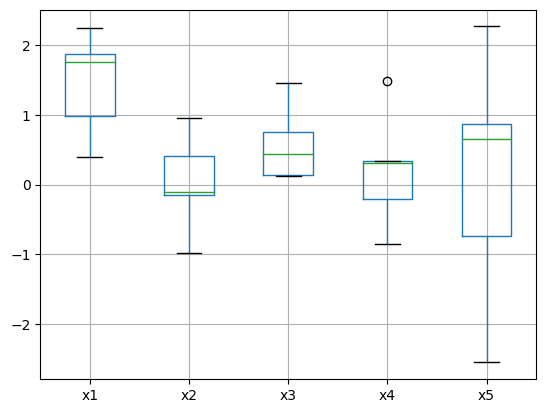

In [2]:
df.boxplot()

In [3]:
from sklearn.preprocessing import StandardScaler
#평균: 0, 표준편차: 1이 되도록 스케일링
scaler = StandardScaler()
df2 = scaler.fit_transform(df)
df3 = pd.DataFrame(df2, columns=df.columns)
df3

,x1,x2,x3,x4,x5
0,0.470603,-1.563986,-0.894240,0.152039,-1.622931
1,-1.574996,1.441239,1.762976,1.655327,0.339756
2,-0.707228,-0.276178,0.357057,-0.546011,0.468792
3,1.185779,-0.201119,-0.939604,0.125344,-0.514569
4,0.625843,0.600045,-0.286189,-1.386700,1.328953


In [5]:
df3.boxplot()

<AxesSubplot:>

In [6]:
import numpy as np
X = np.arange(7).reshape(7, 1)
X

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [7]:
scaler = StandardScaler()
X2 = scaler.fit_transform(X)
X2

array([[-1.5],
       [-1. ],
       [-0.5],
       [ 0. ],
       [ 0.5],
       [ 1. ],
       [ 1.5]])

In [8]:
#이상치가 존재할 경우
X2 = np.vstack([X, [[1000]]])
X2

array([[   0],
       [   1],
       [   2],
       [   3],
       [   4],
       [   5],
       [   6],
       [1000]])

In [9]:
#이상치가 존재할 경우 스케일링을 했을 때 0에 수렴x
scaler.fit_transform(X2)

array([[-0.38705669],
       [-0.38402392],
       [-0.38099115],
       [-0.37795839],
       [-0.37492562],
       [-0.37189286],
       [-0.36886009],
       [ 2.64570872]])

In [10]:
#이상치가 많은 데이터의 경우 RobustScaler사용 - 중앙값: 0, IQR: 1이 되도록 스케일링
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit_transform(X2)

array([[-1.00000000e+00],
       [-7.14285714e-01],
       [-4.28571429e-01],
       [-1.42857143e-01],
       [ 1.42857143e-01],
       [ 4.28571429e-01],
       [ 7.14285714e-01],
       [ 2.84714286e+02]])